<a href="https://colab.research.google.com/github/SilverJester/trial/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Identify the characteristics of the target audience for each AeroFit treadmill product to optimize customer recommendations and improve sales strategies.

# Importing Required Python Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Aerofit CSV File

In [ ]:
path='/content/drive/MyDrive/aerofit_treadmill.csv'
df=pd.read_csv(path)

# Performing an initial exploration of the dataset

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
# Conversion of some columns datatype to categorical
df['Gender']=df['Gender'].astype('category')
df['MaritalStatus']=df['MaritalStatus'].astype('category')



# Detection and Removal of Outliers

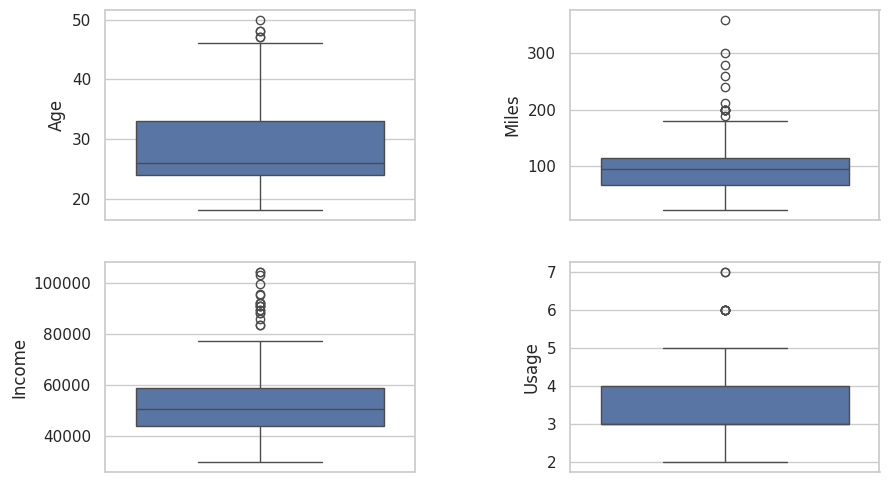

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Miles'])

plt.subplot(2,2,3)
sns.boxplot(df['Income'])

plt.subplot(2,2,4)
sns.boxplot(df['Usage'])

plt.subplots_adjust(wspace=0.5)
plt.show()


In [ ]:
def clipping_outlier(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  upper_boundary=Q3+IQR*1.5
  lower_boundary=Q1-IQR*1.5
  df[column]=np.clip(df[column],lower_boundary,upper_boundary)

column_to_be_clipped=['Age','Miles','Usage','Income']
for column in column_to_be_clipped:
  clipping_outlier(df,column)

df['Age']=df['Age'].astype(int)
df['Usage']=df['Usage'].astype(int)
df['Income']=df['Income'].astype(int)
df['Miles']=df['Miles'].astype(int)


# Adding New Columns

In [ ]:
def price(x):
  if x=='KP281':
    return 1500
  elif x=='KP481':
    return 1750
  else:
    return 2500


df["Selling_Price"]=df['Product'].apply(price)

bin_values_age=[17,24,35,46]
label_values_age=['Young','Adults','Old']
df['Age_Group']=pd.cut(df['Age'],bins=bin_values_age,labels=label_values_age)

bin_values_income=[29000,40000,60000,81000]
label_values_income=['low','moderate','high']
df['Income_Group']=pd.cut(df['Income'],bins=bin_values_income,labels=label_values_income)

bin_values_fitness=[0,2,4,5]
label_values_fitness=['Poor','Average','Excellent']
df['Fitness_Level']=pd.cut(df['Fitness'],bins=bin_values_fitness,labels=label_values_fitness)


In [ ]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price,Age_Group,Income_Group,Fitness_Level
0,KP281,18,Male,14,Single,3,4,29562,112,1500,Young,low,Average
1,KP281,19,Male,15,Single,2,3,31836,75,1500,Young,low,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,Young,low,Average
3,KP281,19,Male,12,Single,3,3,32973,85,1500,Young,low,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,Young,low,Poor


# Non Visual Analysis

## Most Popular Treadmill

In [ ]:
df['Product'].value_counts(ascending=False).reset_index()

,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


## Which treadmill generates the most revenue

In [ ]:
temp_df=df.groupby('Product')['Selling_Price'].value_counts().reset_index()
temp_df['Revenue']=temp_df['Selling_Price']*temp_df['count']
temp_df

,Product,Selling_Price,count,Revenue
0,KP281,1500,80,120000
1,KP481,1750,60,105000
2,KP781,2500,40,100000


# Calculatng Probabilites

## Marginal Probability

In [ ]:
#Using normalize function
((df['Product'].value_counts(normalize=True))*100).reset_index()


,Product,proportion
0,KP281,44.444444
1,KP481,33.333333
2,KP781,22.222222


In [ ]:
#Using crosstab
product_crosstab=pd.crosstab(index=df['Product'], columns='count')
total_customers=product_crosstab['count'].sum()
product_crosstab['marginal_probability']=(product_crosstab['count'] / total_customers) * 100

product_crosstab.reset_index()


col_0,Product,count,marginal_probability
0,KP281,80,44.444444
1,KP481,60,33.333333
2,KP781,40,22.222222


## Probability that the customer buys a product based on each column.

In [ ]:
# Gender
C_gender = pd.crosstab(df['Gender'], df['Product'])


P_gender = round(C_gender / C_gender.sum().sum(),2)
P_gender

Product,KP281,KP481,KP781
Gender,,,
Female,0.22,0.16,0.04
Male,0.22,0.17,0.18


In [ ]:
# Age
C_age = pd.crosstab(df['Age_Group'], df['Product'])


P_age= round(C_age / C_age.sum().sum(),2)
P_age

Product,KP281,KP481,KP781
Age_Group,,,
Young,0.15,0.09,0.06
Adults,0.22,0.19,0.13
Old,0.08,0.04,0.03


In [ ]:
# Income
C_income = pd.crosstab(df['Income_Group'], df['Product'])


P_income= round(C_income / C_income.sum().sum(),2)
P_income

Product,KP281,KP481,KP781
Income_Group,,,
low,0.13,0.05,0.00
moderate,0.28,0.24,0.06
high,0.03,0.04,0.16


In [ ]:
# Marital Status
C_marital = pd.crosstab(df['MaritalStatus'], df['Product'])


P_marital= round(C_marital / C_marital.sum().sum(),2)
P_marital

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.27,0.20,0.13
Single,0.18,0.13,0.09


In [ ]:
# Education
C_education = pd.crosstab(df['Education'], df['Product'])


P_education= round(C_education / C_education.sum().sum(),2)
P_education

Product,KP281,KP481,KP781
Education,,,
12,0.01,0.01,0.00
13,0.02,0.01,0.00
14,0.17,0.13,0.01
15,0.02,0.01,0.00
16,0.22,0.17,0.08
18,0.01,0.01,0.11
20,0.00,0.00,0.01
21,0.00,0.00,0.02


In [ ]:
# Usage
C_usage = pd.crosstab(df['Usage'], df['Product'])


P_usage= round(C_usage / C_usage.sum().sum(),2)
P_usage

Product,KP281,KP481,KP781
Usage,,,
2,0.11,0.08,0.00
3,0.21,0.17,0.01
4,0.12,0.07,0.10
5,0.01,0.02,0.12


In [ ]:
# Fitness Level
C_ftiness = pd.crosstab(df['Fitness_Level'], df['Product'])


P_ftiness= round(C_ftiness / C_ftiness.sum().sum(),2)
P_ftiness

Product,KP281,KP481,KP781
Fitness_Level,,,
Poor,0.08,0.07,0.00
Average,0.35,0.26,0.06
Excellent,0.01,0.00,0.16


## Conditional Probability

In [ ]:
# Based on Marital Status
crosstab_marital = pd.crosstab(df['MaritalStatus'], df['Product'])
marital_totals = crosstab_marital.sum(axis=1)
probability_marital = round(crosstab_marital.div(marital_totals, axis=0),2)

probability_marital

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.45,0.34,0.21
Single,0.44,0.33,0.23


In [ ]:
# Based on Gender
crosstab_gender = pd.crosstab(df['Gender'], df['Product'])
gender_totals = crosstab_gender.sum(axis=1)
probability_gender = round(crosstab_gender.div(gender_totals, axis=0),2)
probability_gender

Product,KP281,KP481,KP781
Gender,,,
Female,0.53,0.38,0.09
Male,0.38,0.30,0.32


In [ ]:
# Based on Age

crosstab_age=pd.crosstab(df['Age_Group'], df['Product'])
age_totals = crosstab_age.sum(axis=1)
probability_age=round(crosstab_age.div(age_totals, axis=0),2)
probability_age

Product,KP281,KP481,KP781
Age_Group,,,
Young,0.5,0.31,0.19
Adults,0.4,0.36,0.24
Old,0.5,0.29,0.21


In [ ]:
# Based on Income

crosstab_income=pd.crosstab(df['Income_Group'], df['Product'])
income_totals = crosstab_income.sum(axis=1)
probability_income=round(crosstab_income.div(income_totals, axis=0),2)
probability_income

Product,KP281,KP481,KP781
Income_Group,,,
low,0.72,0.28,0.00
moderate,0.48,0.42,0.10
high,0.14,0.17,0.69


# Visual Analysis

## Univariate Analysis

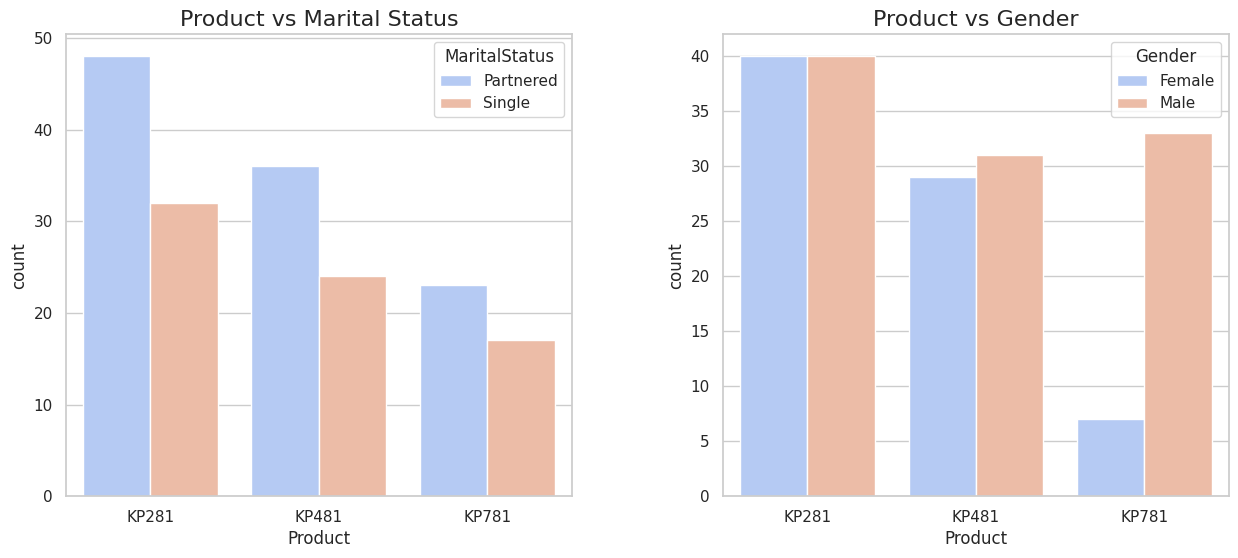

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,6))

palette='coolwarm'
plt.subplot(1,2,1)
sns.countplot(data=df,x='Product',hue='MaritalStatus',palette=palette)
plt.title('Product vs Marital Status', fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data=df,x='Product',hue='Gender',palette=palette)
plt.title('Product vs Gender', fontsize=16)

plt.subplots_adjust(wspace=0.3)
plt.show()

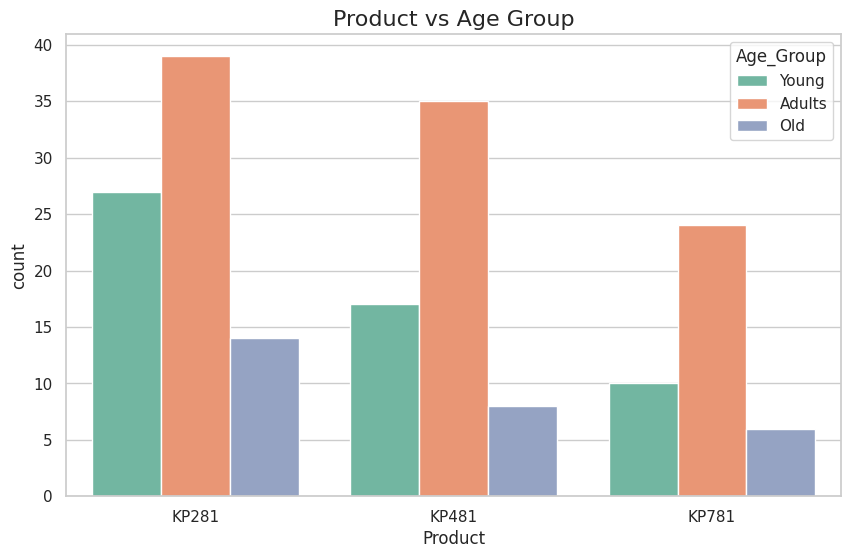

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Product',hue='Age_Group',palette='Set2')
plt.title('Product vs Age Group', fontsize=16)
plt.show()

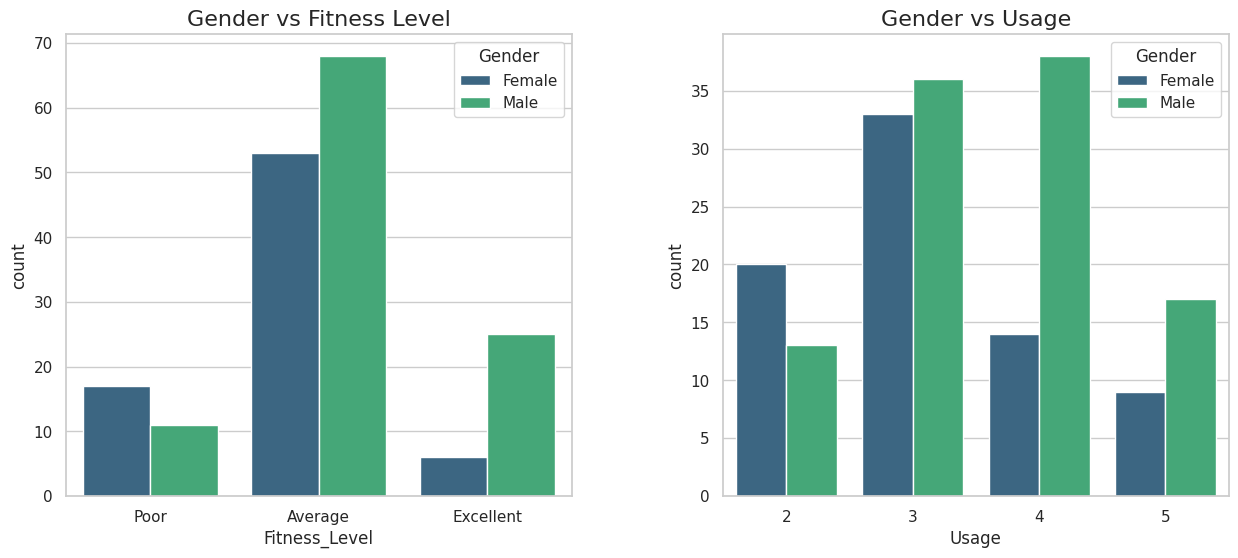

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,6))
palette='viridis'
plt.subplot(1,2,1)
sns.countplot(data=df,x='Fitness_Level',hue='Gender',palette=palette)
plt.title('Gender vs Fitness Level', fontsize=16)


plt.subplot(1,2,2)
sns.countplot(data=df,x='Usage',hue='Gender',palette=palette)
plt.title('Gender vs Usage', fontsize=16)

plt.subplots_adjust(wspace=0.3)
plt.show()

## Bivariate Analysis

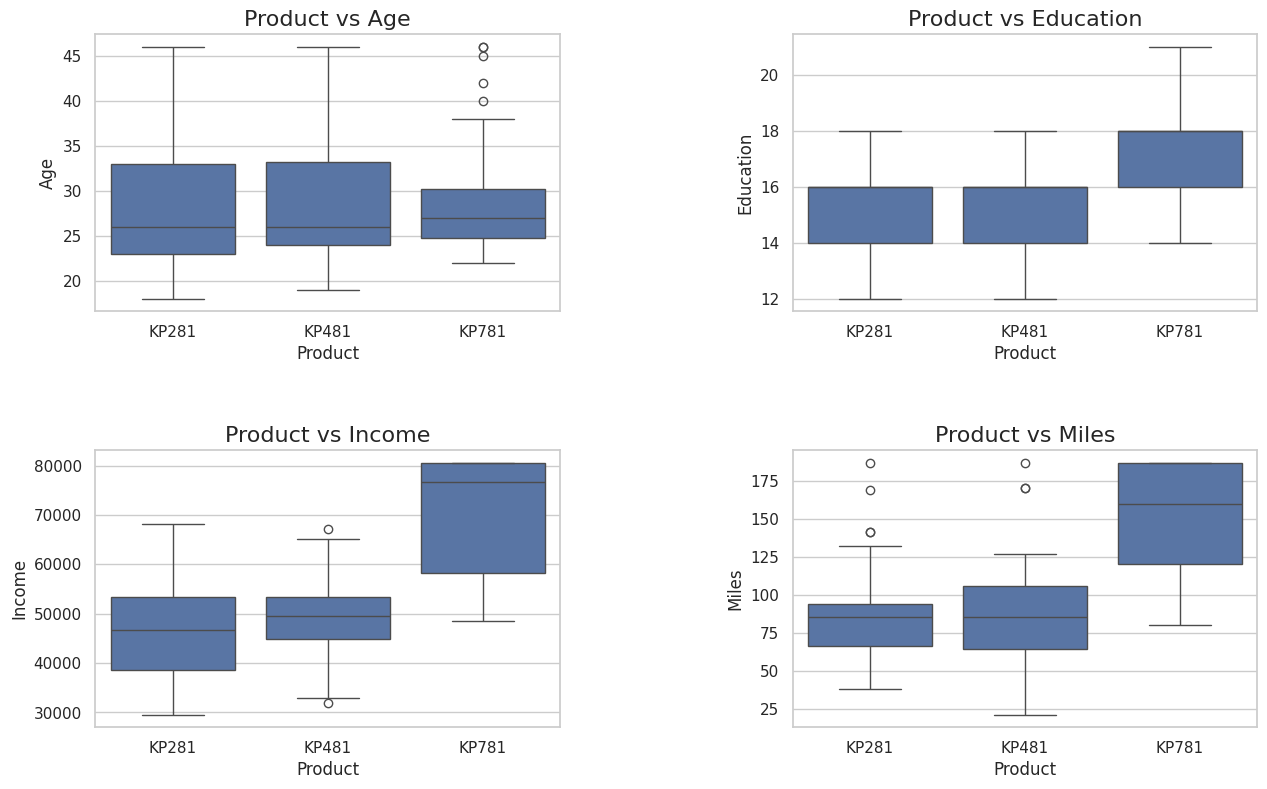

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='Product',y='Age')
plt.title('Product vs Age', fontsize=16)

plt.subplot(2,2,2)
sns.boxplot(data=df,x='Product',y='Education')
plt.title('Product vs Education', fontsize=16)

plt.subplot(2,2,3)
sns.boxplot(data=df,x='Product',y='Income')
plt.title('Product vs Income', fontsize=16)

plt.subplot(2,2,4)
sns.boxplot(data=df,x='Product',y='Miles')
plt.title('Product vs Miles', fontsize=16)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

## Correlation Heatmap

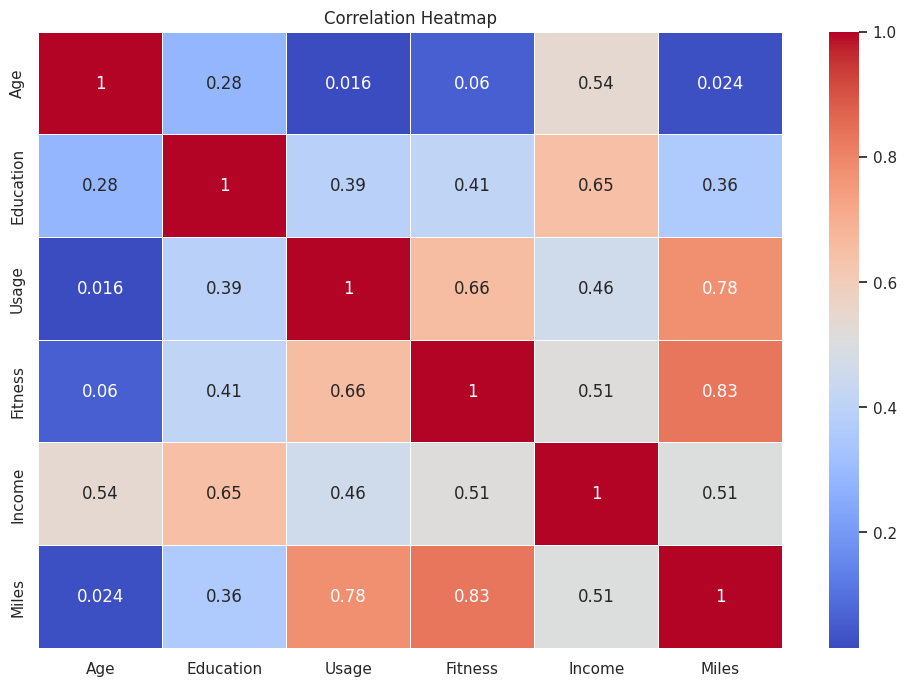

In [ ]:
numercial_dtypes=df.drop('Selling_Price',axis=1).select_dtypes(include=['float64','int64'])

correlation_matrix=numercial_dtypes.corr()
correlation_matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Customer Profiling

## For KP281

In [ ]:
KP281_data=df[df['Product']=='KP281']
KP281_data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price,Age_Group,Income_Group,Fitness_Level
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000,80.0,80,80,80
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,3
top,KP281,NaN,Female,NaN,Partnered,NaN,NaN,NaN,NaN,NaN,Adults,moderate,Average
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN,NaN,39,51,63
mean,NaN,28.487500,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.775000,1500.0,NaN,NaN,NaN
std,NaN,7.051338,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.828157,0.0,NaN,NaN,NaN
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000,1500.0,NaN,NaN,NaN
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000,1500.0,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000,1500.0,NaN,NaN,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000,1500.0,NaN,NaN,NaN


In [ ]:
KP281_data['Age_Group'].value_counts(ascending=False)

,count
Age_Group,
Adults,39
Young,27
Old,14


In [ ]:
# Age of customers who buy KP281 is mainly between 18 to 35 and a few between 35 to 46
# Product is commonly Purchased by married women
# Weekly usage on average is 3 times
# Fitness Level is average i.e between 2 and 4
# Avergae Education level of all the customers is 15 years
# Annual income of customers is less that USD 60000
# verage number of miles the customer expects to walk/run each week is 82

## For KP481

In [ ]:
KP481_data=df[df['Product']=='KP481']
KP481_data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price,Age_Group,Income_Group,Fitness_Level
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000,60.0,60,60,60
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,2
top,KP481,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,NaN,Adults,moderate,Average
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN,NaN,35,44,47
mean,NaN,28.866667,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.516667,1750.0,NaN,NaN,NaN
std,NaN,6.552181,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,31.807414,0.0,NaN,NaN,NaN
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000,1750.0,NaN,NaN,NaN
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000,1750.0,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000,1750.0,NaN,NaN,NaN
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000,1750.0,NaN,NaN,NaN


In [ ]:
KP481_data['Income_Group'].value_counts(ascending=False)

,count
Income_Group,
moderate,44
low,9
high,7


In [ ]:
# Age of customers who buy KP281 is mainly between 24 to 35 and a few between 35 to 46
# Product is commonly Purchased by married men
# Weekly usage on average is 3 times
# Fitness Level is average i.e between 2 and 4
# Avergae Education level of all the customers is 15 years
# Annual income of customers is between USD 40000 and  USD 60000
# verage number of miles the customer expects to walk/run each week is 87

## For KP781

In [ ]:
KP781_data=df[df['Product']=='KP781']
KP781_data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Selling_Price,Age_Group,Income_Group,Fitness_Level
count,40,40.000000,40,40.000000,40,40.0000,40.000000,40.000000,40.000000,40.0,40,40,40
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,3,2,2
top,KP781,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,NaN,Adults,high,Excellent
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN,NaN,24,29,29
mean,NaN,29.025000,NaN,17.325000,NaN,4.5000,4.625000,69684.150000,152.325000,2500.0,NaN,NaN,NaN
std,NaN,6.772825,NaN,1.639066,NaN,0.5547,0.667467,12532.561092,35.184049,0.0,NaN,NaN,NaN
min,NaN,22.000000,NaN,14.000000,NaN,3.0000,3.000000,48556.000000,80.000000,2500.0,NaN,NaN,NaN
25%,NaN,24.750000,NaN,16.000000,NaN,4.0000,4.000000,58204.750000,120.000000,2500.0,NaN,NaN,NaN
50%,NaN,27.000000,NaN,18.000000,NaN,5.0000,5.000000,76568.500000,160.000000,2500.0,NaN,NaN,NaN
75%,NaN,30.250000,NaN,18.000000,NaN,5.0000,5.000000,80581.000000,187.000000,2500.0,NaN,NaN,NaN


In [ ]:
KP781_data['Income_Group'].value_counts(ascending=False)

,count
Income_Group,
high,29
moderate,11
low,0


In [ ]:
# Age of customers who buy KP281 is mainly between 24 to 35 and a few between 35 to 46
# Product is commonly Purchased by married men
# Weekly usage on average is 5 times
# Fitness Level is excellent i.e between 4 and 5
# Avergae Education level of all the customers is 17 years
# Annual income of customers is higher than USD 60000
# verage number of miles the customer expects to walk/run each week is 152

# Business Insights

1) KP281 is the most sold product and generates the most revenue while KP781 is the least sold product and generates the least revenue

2) The Product is purchased more by men and married couples

3)Adults in the age range of 24 and 35 are prime customers

4) On an average men use the treadmill more on a weekly basis and are in better shape
KP781 is the high end model and is only purchased by customers who earn more and are physically fit.

# Recommendation to Aerofit to grow their buisness

1)Marketing strategies for KP781 should be designed in such a way that it would attracts female customers as only 18 percent females buy this product.

2)Offer flexible payment plans or financing options for the KP781 treadmill to make it more accessible to customers with lower incomes.

3)Position the KP281 treadmill as ideal for beginners or those new to fitness, as many users fall within the Beginner to Intermediate fitness levels.

4)Focus marketing efforts on customers aged 18-35, as they are the primary buyers of the KP281 treadmill.